In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
def plot_scatter_and_line(x, y, plot_line=False, ypred = None):
  plt.scatter(x, y, color='blue', alpha=0.7)
  plt.xlabel(df.columns[0])
  plt.ylabel(df.columns[1])
  plt.grid(True)
  if plot_line:
    plt.plot(x, ypred, color='red', label=f'Fit: y = {m:.2f}x + {c:.2f}')
  plt.show()

In [55]:
# gets our x and y attributes
filename = "/content/Salary_dataset.csv"
df = pd.read_csv(filename)
df = df.iloc[:, 1:]
x = df.iloc[:, 0]
y = df.iloc[:, 1]
x.head(), y.head()

(0    1.2
 1    1.4
 2    1.6
 3    2.1
 4    2.3
 Name: YearsExperience, dtype: float64,
 0    39344.0
 1    46206.0
 2    37732.0
 3    43526.0
 4    39892.0
 Name: Salary, dtype: float64)

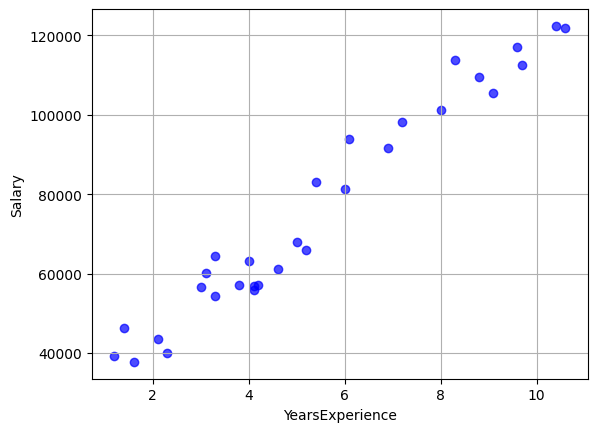

In [56]:
# scatter plot bw our x and y
plot_scatter_and_line(x, y)

In [57]:
# calculating regression coefficients
xbar = x.mean().item()
ybar = y.mean().item()
xstd = x.std()
ystd = y.std()
# not computing matrix, only covariance needed here
cov_xy = x.cov(y)
r = cov_xy / (xstd*ystd)

# line params
m = r * ystd / xstd
c = ybar - m*xbar

In [58]:
# make prediction
ypred = m*x + c
ypred.name = "Predicted salary"
ypred.head()

,Predicted salary
0,36188.158752
1,38078.151217
2,39968.143681
3,44693.124842
4,46583.117306


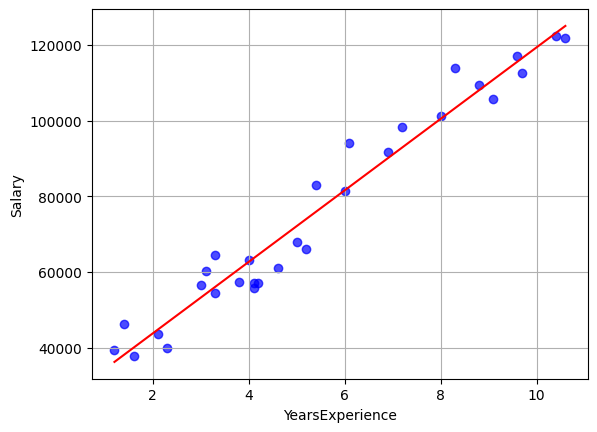

In [59]:
# compare fit
plot_scatter_and_line(x, y, plot_line=True, ypred=ypred)

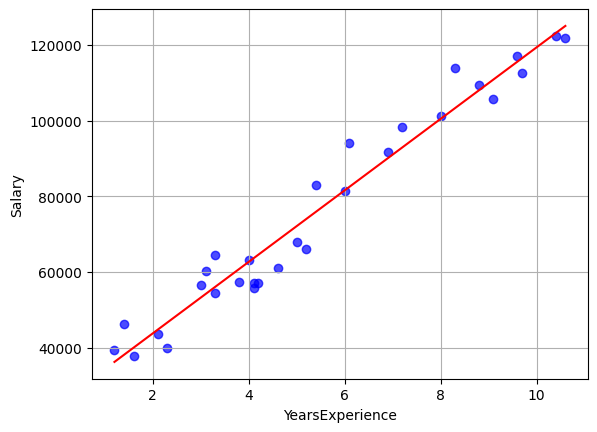

In [81]:
# check the fit using numpy polyfit
m, c = np.polyfit(x, y, 1)
ypred_np = m*x + c
ypred_np.name = "Predicted salary"
plot_scatter_and_line(x, y, plot_line=True, ypred=ypred_np)

In [84]:
# computes MSE
def MSE(y, yt):
  return ((y - yt) @ (y - yt)) / y.shape[0]

In [85]:
# compute MSE for both
manual_loss = MSE(y, ypred)
np_loss = MSE(y, ypred_np)
manual_loss, np_loss

# not very satisfactory :P

(np.float64(31270951.722280942), np.float64(31270951.72228096))